# CSE4212: Artificail Intelligence Lab
### **Date:** 8 March, 2024

## Group 2:

- Nazmus Shakib

  **ID:** 1910876105

  **Session:** 2018-19

- Md. Ahanaf Arif Khan
  
  **ID:** 1910676110

  **Session:** 2018-19

- Farjana Aktar,

  **ID:** 1912276145

  **Session:** 2018-19

- Mohammad Ashif,

  **ID:** 1711076147

  **Session:** 2016-17



# Assignment 4 UPDATE(Group-wise submission)
Write a report on your binary classifier trained and tested using your private data collected by your mobile-phone cameras/conventional cameras/ laptop web cameras. Report should be submitted in PDF format prepared by Latex.

Report should include as many analysis as possible about the results, procedure of tuning hyper-parameters to get better results.

In order to avoid same image classes, groups are requested to entry their image class in the following sheet:
https://docs.google.com/spreadsheets/d/1Ul_UZ306WAcCpnY2pwcs0C1JLrV-iNkuKSWGX1GXAjQ/edit?usp=sharing
Each group needs to collect at least 400 images per class.

Group need to build, train and test both a fully connected neural network-based binary classifier and convolutional neural network based binary classifier.

# Mount Google Drive

Our dataset is stored in Google Drive. So, we need to mount drive first in order to load the dataset.

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.metrics import CategoricalAccuracy, BinaryAccuracy, Precision, Recall, F1Score
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-03-16 08:47:04.691380: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-16 08:47:05.310357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 08:47:05.310412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 08:47:05.411648: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 08:47:05.634638: I tensorflow/core/platform/cpu_feature_guar

# Hyper-Parameters

In [28]:
batch_size = 32
image_size = (32, 32)
learning_rate = 1e-4
epochs = 30
label_mode = 'int'

# Loading the Dataset

The dataset is stored as a zip file in google drive. First, we need to extract it.

In [29]:
dataset_base_path = './'
db_name = 'dataset_256'
!unzip -o -q '{dataset_base_path}/{db_name}'

Create a dataset object for train, validation and test datasets respectively.

In [30]:
train_ds = keras.utils.image_dataset_from_directory(
    f'{db_name}/train',
    image_size=image_size,
    batch_size=batch_size,
    label_mode=label_mode,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    f'{db_name}/valid',
    image_size=image_size,
    batch_size=batch_size,
    label_mode=label_mode,
    shuffle=False
)

test_ds = keras.utils.image_dataset_from_directory(
    f'{db_name}/test',
    image_size=image_size,
    batch_size=batch_size,
    label_mode=label_mode,
    shuffle=False
)

# Used for plotting
class_names = train_ds.class_names

test_ds = test_ds.map(lambda x, y: (x, tf.cast(y, tf.float32)))

Found 782 files belonging to 2 classes.
Found 106 files belonging to 2 classes.


Found 160 files belonging to 2 classes.


# Plot Samples from the Dataset

Our dataset contains images of books and notebooks. The images are of  resolution 32 x 32 pixels. Let us view a few samples from the dataset.

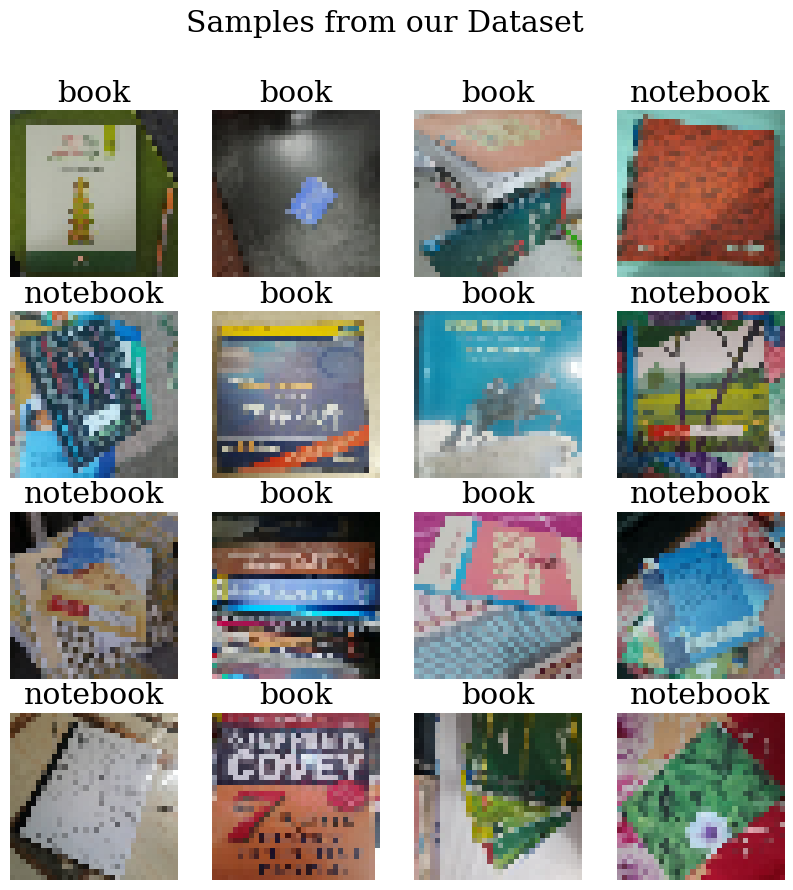

In [31]:
for imgs, labels in train_ds:
  break

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '18'


plt.figure(figsize=(10, 10))
plt.suptitle('Samples from our Dataset')
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(imgs[i] / 255)
  plt.axis('off')
  plt.title(class_names[labels[i]])
plt.show();

# Fully Connected Network

### Create the Model and View Summary

In [32]:
inputs = Input(shape=image_size + (3,))
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

fc_model = keras.Model(inputs, outputs, name='FC_Model')
fc_model.summary()

Model: "FC_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               786688    
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 128)               165

### Compile and Fit the model

In [33]:
fc_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

history = fc_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        ModelCheckpoint('fc_model.keras', save_weights_only=False, save_best_only=True, verbose=1),
    ],
)

Epoch 1/30
19/25 [=====================>........] - ETA: 0s - loss: 5.9825 - accuracy: 0.5724  
Epoch 1: val_loss improved from inf to 1.77856, saving model to fc_model.keras
25/25 [==============================] - 1s 9ms/step - loss: 5.1189 - accuracy: 0.5882 - val_loss: 1.7786 - val_accuracy: 0.6698
Epoch 2/30
16/25 [==================>...........] - ETA: 0s - loss: 1.6949 - accuracy: 0.6621
Epoch 2: val_loss improved from 1.77856 to 1.25262, saving model to fc_model.keras
25/25 [==============================] - 0s 6ms/step - loss: 1.5216 - accuracy: 0.6611 - val_loss: 1.2526 - val_accuracy: 0.6509
Epoch 3/30
18/25 [====================>.........] - ETA: 0s - loss: 0.9107 - accuracy: 0.7049
Epoch 3: val_loss improved from 1.25262 to 1.21677, saving model to fc_model.keras
25/25 [==============================] - 0s 6ms/step - loss: 0.9015 - accuracy: 0.7110 - val_loss: 1.2168 - val_accuracy: 0.6509
Epoch 4/30
21/25 [========================>.....] - ETA: 0s - loss: 0.9252 - accurac

### Plotting the loss and accuracy curves

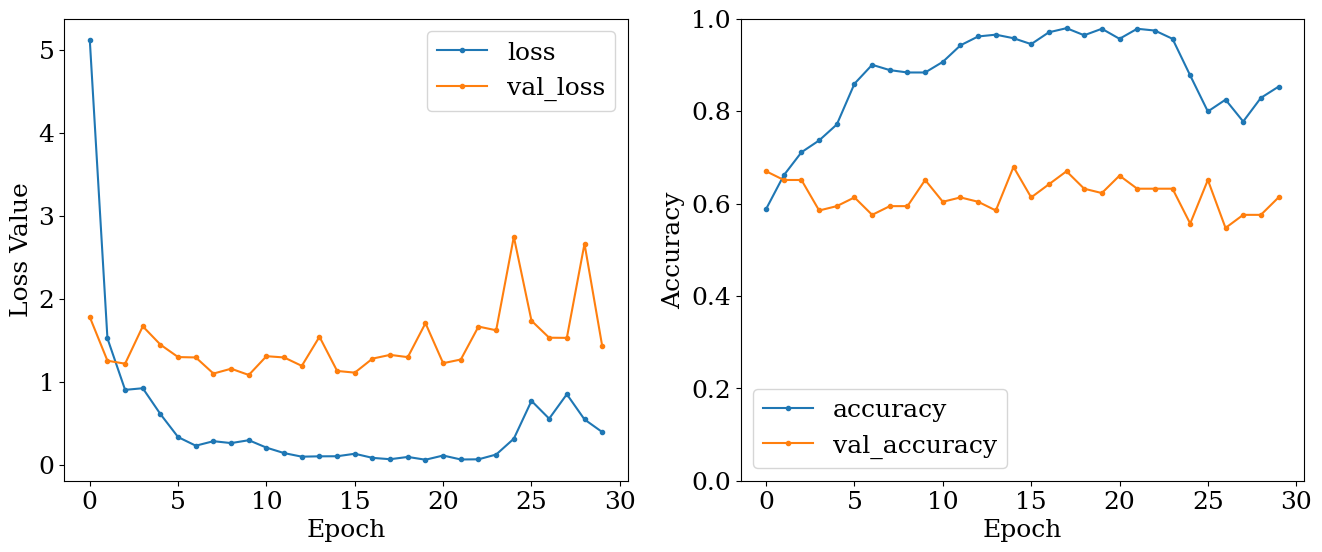

In [34]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Loading the best checkpoint and evaluating model using the test dataset

In [35]:
fc_model = keras.models.load_model('fc_model.keras')

fc_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(name='accuracy'),
        Precision(name='precision'),
        Recall(name='recall'),
        F1Score(name='f1score'),
    ]
)

eval = fc_model.evaluate(test_ds, return_dict=True)

eval

5/5 [==============================] - 1s 2ms/step - loss: 1.4020 - accuracy: 0.5250 - precision: 0.5417 - recall: 0.4756 - f1score: 0.6777        


{'loss': 1.4019920825958252,
 'accuracy': 0.5249999761581421,
 'precision': 0.5416666865348816,
 'recall': 0.47560974955558777,
 'f1score': array([0.6776859], dtype=float32)}

# Simple CNN

### Create the Simple CNN Model and View Summary

In [36]:
inputs = Input(shape=image_size + (3,))
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

scnn_model = keras.Model(inputs, outputs, name='SCNN_Model')
scnn_model.summary()

Model: "SCNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)       590080    
                                                        

### Compile and Fit the model

In [37]:
scnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

history = scnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        ModelCheckpoint('scnn_model.keras', save_weights_only=False, save_best_only=True, verbose=1),
    ],
)

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 0.7670 - accuracy: 0.5818
Epoch 1: val_loss improved from inf to 0.69208, saving model to scnn_model.keras
25/25 [==============================] - 3s 30ms/step - loss: 0.7670 - accuracy: 0.5818 - val_loss: 0.6921 - val_accuracy: 0.5566
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.6854
Epoch 2: val_loss improved from 0.69208 to 0.64722, saving model to scnn_model.keras
25/25 [==============================] - 1s 26ms/step - loss: 0.6109 - accuracy: 0.6854 - val_loss: 0.6472 - val_accuracy: 0.6038
Epoch 3/30
23/25 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.7391
Epoch 3: val_loss improved from 0.64722 to 0.62216, saving model to scnn_model.keras
25/25 [==============================] - 1s 27ms/step - loss: 0.5393 - accuracy: 0.7340 - val_loss: 0.6222 - val_accuracy: 0.5943
Epoch 4/30
25/25 [==============================] - ETA: 0s - loss: 0.4830 - 

### Plotting the loss and accuracy curves

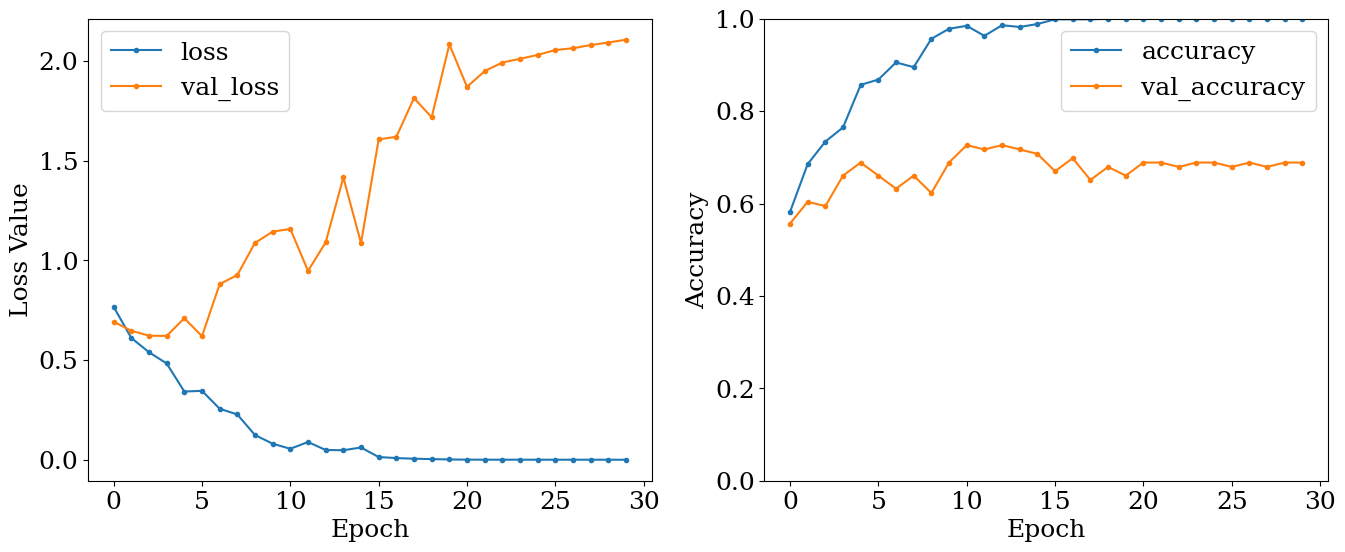

In [38]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Loading the best checkpoint and evaluating using the test dataset

In [39]:
scnn_model = keras.models.load_model('scnn_model.keras')

scnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(name='accuracy'),
        Precision(name='precision'),
        Recall(name='recall'),
        F1Score(name='f1score'),
    ]
)

eval = scnn_model.evaluate(test_ds, return_dict=True)

eval

5/5 [==============================] - 0s 6ms/step - loss: 0.6641 - accuracy: 0.6562 - precision: 0.7077 - recall: 0.5610 - f1score: 0.6777        


{'loss': 0.664068341255188,
 'accuracy': 0.65625,
 'precision': 0.7076923251152039,
 'recall': 0.5609756112098694,
 'f1score': array([0.6776859], dtype=float32)}

# VGG16 Model With Randomlly Initialized Weights

### Creating the VGG16 Model and Viewing its Summary

In [40]:
vgg16_model = vgg16.VGG16(include_top=False, weights=None, input_shape=image_size+(3,))

inputs = vgg16_model.input
x = Flatten()(vgg16_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

vgg16_model = keras.Model(inputs, outputs, name='VGG16_Model')
vgg16_model.summary()

Model: "VGG16_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         

### Compile and Fit the Model

In [41]:
vgg16_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

history = vgg16_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        ModelCheckpoint('vgg16_model-noTL.keras', save_weights_only=False, save_best_only=True, verbose=1),
    ],
)

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.5281
Epoch 1: val_loss improved from inf to 0.69028, saving model to vgg16_model-noTL.keras
25/25 [==============================] - 4s 38ms/step - loss: 0.6981 - accuracy: 0.5281 - val_loss: 0.6903 - val_accuracy: 0.5849
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.5460
Epoch 2: val_loss did not improve from 0.69028
25/25 [==============================] - 0s 16ms/step - loss: 0.6816 - accuracy: 0.5460 - val_loss: 0.7042 - val_accuracy: 0.4811
Epoch 3/30
24/25 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5651
Epoch 3: val_loss improved from 0.69028 to 0.66353, saving model to vgg16_model-noTL.keras
25/25 [==============================] - 1s 31ms/step - loss: 0.6697 - accuracy: 0.5665 - val_loss: 0.6635 - val_accuracy: 0.5660
Epoch 4/30
25/25 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.6650
Epoch 4: 

### Plotting the loss and accuracy graphs

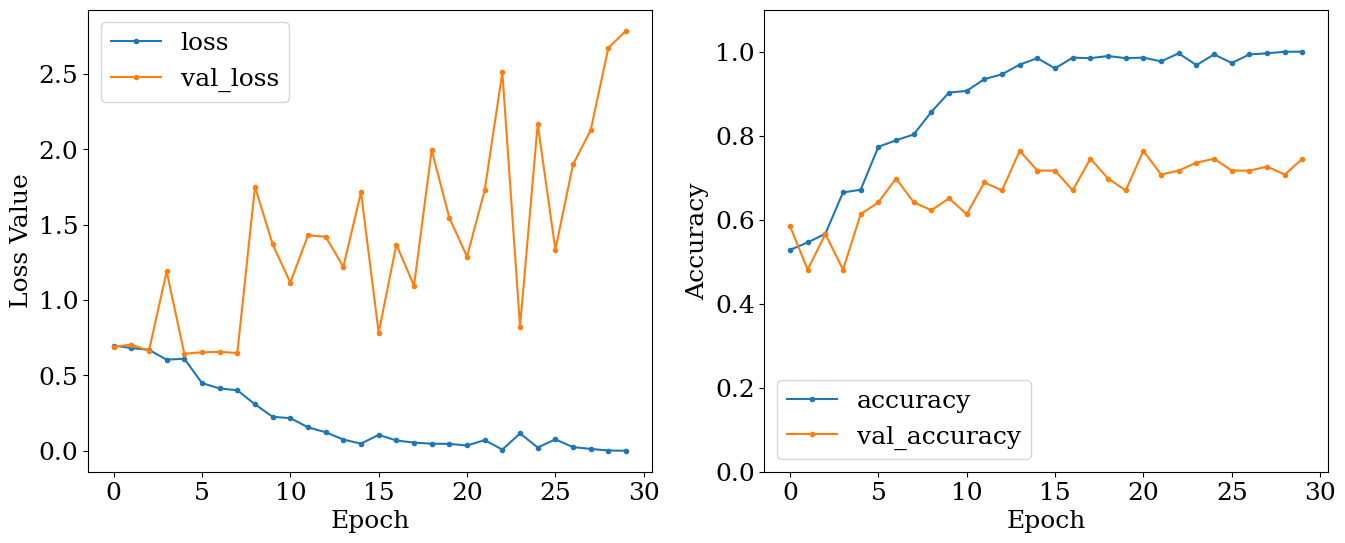

In [42]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Loading the best checkpoint and evaluating the model using the test dataset

In [43]:
vgg16_model = keras.models.load_model('vgg16_model-noTL.keras')

vgg16_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(name='accuracy'),
        Precision(name='precision'),
        Recall(name='recall'),
        F1Score(name='f1score'),
    ]
)

eval = vgg16_model.evaluate(test_ds, return_dict=True)

eval

5/5 [==============================] - 0s 11ms/step - loss: 0.6172 - accuracy: 0.6438 - precision: 0.7273 - recall: 0.4878 - f1score: 0.6777       


{'loss': 0.6172350645065308,
 'accuracy': 0.643750011920929,
 'precision': 0.7272727489471436,
 'recall': 0.4878048896789551,
 'f1score': array([0.6776859], dtype=float32)}

# Result Analysis

Gathering all the test labels inside a list

In [44]:
labels = []
for x, y in test_ds:
    labels.extend(y.numpy().tolist())
# print(labels)

## Confusion Matrices

### Confusion Matrix for FCNN model predictions

In [97]:
fcnn_predictions = fc_model.predict(test_ds)
fcnn_predictions = (fcnn_predictions > 0.5).astype(np.uint8)
fcnn_predictions = fcnn_predictions.reshape(160,).tolist()

5/5 [==============================] - 0s 12ms/step


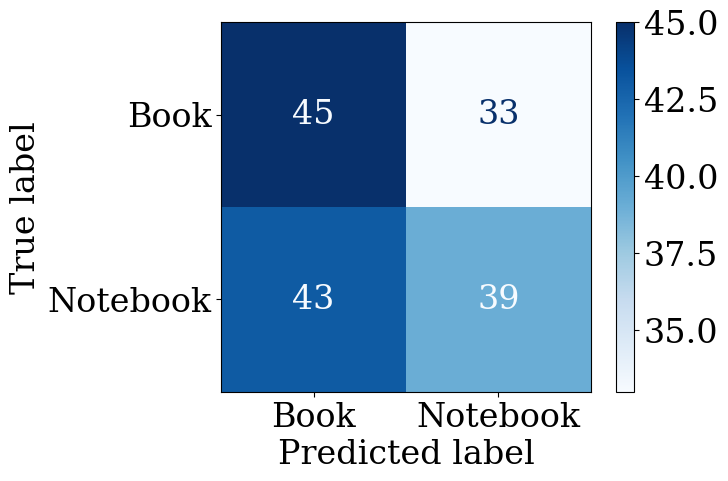

In [98]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '24'

conf_matrix = confusion_matrix(labels, fcnn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Book', 'Notebook'])
disp.plot(cmap='Blues', values_format='d')


plt.show()

In [105]:
conf_matrix

array([[63, 15],
       [42, 40]])

### Confusion matrix for FCNN model predictions

In [100]:
scnn_predictions = scnn_model.predict(test_ds)
scnn_predictions = (scnn_predictions > 0.5).astype(np.uint8)
scnn_predictions = scnn_predictions.reshape(160,).tolist()

5/5 [==============================] - 0s 5ms/step


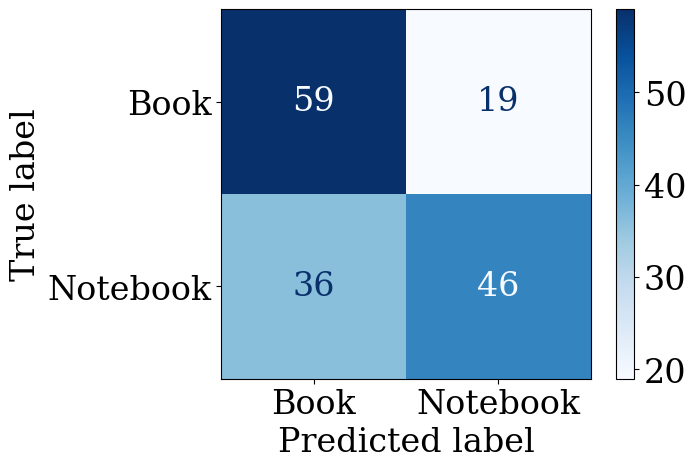

In [101]:
conf_matrix = confusion_matrix(labels, scnn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Book', 'Notebook'])
disp.plot(cmap='Blues', values_format='d')


plt.show()

### Confusion matrix for VGG16 model predictions

In [103]:
vgg16_predictions = vgg16_model.predict(test_ds)
vgg16_predictions = (vgg16_predictions > 0.5).astype(np.uint8)
vgg16_predictions = vgg16_predictions.reshape(160,).tolist()

1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step


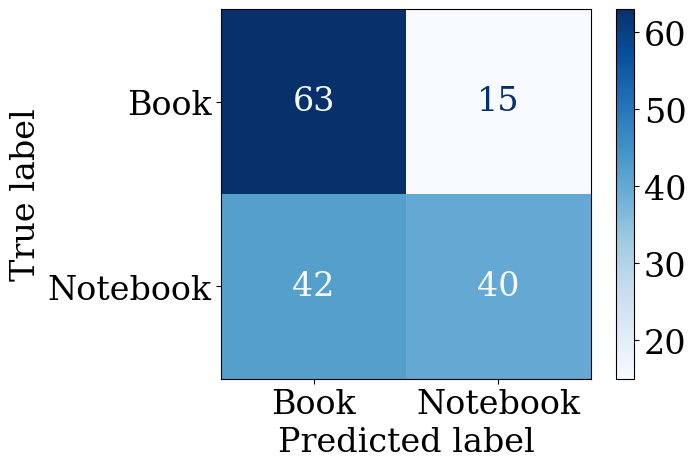

In [104]:
conf_matrix = confusion_matrix(labels, vgg16_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Book', 'Notebook'])
disp.plot(cmap='Blues', values_format='d')
plt.show()